In [1]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense, Flatten, Dropout, BatchNormalization
from emnist import extract_training_samples
from emnist import extract_test_samples

def data(x_train, y_train, x_test, y_test):
    # train/validation split
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=420)
    
    # Normalisation/Standarization
    x_train = x_train.astype('float32')
    x_val = x_val.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_val /= 255
    x_test /= 255
    
    # Converting labels in one-hot encoded values
    y_train = to_categorical(y_train, 10)
    y_val = to_categorical(y_val, 10)
    
    # Reshaping the input data so it can be ingested by a convolutional layer
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    
    # return all the data sets
    return x_train, x_val, x_test, y_train, y_val, y_test

In [2]:
images, labels = extract_training_samples('digits')
images_test, labels_test = extract_test_samples('digits')

x2_train, x2_val, x2_test, y2_train, y2_val, y2_test = data(images, labels, images_test, labels_test)

In [5]:
net6 = Sequential(name='LeNetv6')
net6.add(Conv2D(filters=12, kernel_size=(5,5), activation='relu', input_shape=(28,28,1), padding="same", name='1.Conv1'))
net6.add(BatchNormalization())
net6.add(AveragePooling2D(pool_size=(2,2), name='2.MaxPool1'))
net6.add(Conv2D(24, (5,5), activation='relu',strides=(2,2), name='3.Conv2'))
net6.add(BatchNormalization())
net6.add(AveragePooling2D(pool_size=(2,2), name='4.MaxPool2'))
net6.add(Flatten())
net6.add(Dense(256, activation='relu', name='5.FullyConnected1'))
net6.add(BatchNormalization())
net6.add(Dropout(rate=0.3)) # drop-out so that some node's activities are fixed to 0 and the network generalises better
net6.add(Dense(128, activation='tanh', name='6.FullyConnected2'))
net6.add(Dropout(rate=0.35)) # drop-out so that some node's activities are fixed to 0 and the network generalises better
net6.add(Dense(10, activation='softmax', name='7.FullyConnected3'))

In [6]:
net6.compile(loss='categorical_crossentropy', optimizer='adam')
history = net6.fit(x2_train, y2_train, 
                  validation_data=(x2_val, y2_val), 
                  epochs=10, 
                  batch_size=256)

Epoch 1/10
750/750 [==============================] - 87s 116ms/step - loss: 0.1201 - val_loss: 0.0435
Epoch 2/10
750/750 [==============================] - 84s 112ms/step - loss: 0.0408 - val_loss: 0.0346
Epoch 3/10
750/750 [==============================] - 82s 110ms/step - loss: 0.0332 - val_loss: 0.0304
Epoch 4/10
750/750 [==============================] - 90s 120ms/step - loss: 0.0286 - val_loss: 0.0263
Epoch 5/10
750/750 [==============================] - 93s 125ms/step - loss: 0.0255 - val_loss: 0.0303
Epoch 6/10
750/750 [==============================] - 90s 120ms/step - loss: 0.0238 - val_loss: 0.0271
Epoch 7/10
750/750 [==============================] - 91s 121ms/step - loss: 0.0218 - val_loss: 0.0282
Epoch 8/10
750/750 [==============================] - 87s 116ms/step - loss: 0.0207 - val_loss: 0.0283
Epoch 9/10
750/750 [==============================] - 93s 124ms/step - loss: 0.0189 - val_loss: 0.0252
Epoch 10/10
750/750 [==============================] - 91s 121ms/step - l

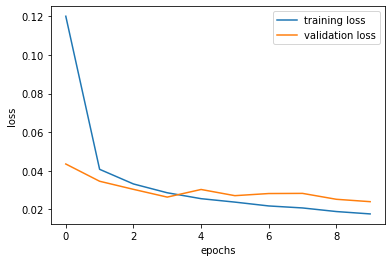

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [11]:
import numpy as np
outputs=net6.predict(x2_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==y2_test)
print('Percentage correctly classified MNIST= ',100*correct_classified/y2_test.size)

Percentage correctly classified MNIST=  99.375


In [12]:
net6.save("Manuel_Ortiz_2.h5")